In [11]:
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')

Duplicate data

Missing data

Outliers

Noisy data - white noise

Noisy data - Correlated noise

Correlated variables

Data that's not linearly separable

In [90]:
def create_circular_data(r):
  theta = np.linspace(0, 2*np.pi, 100)
  x, y = r*np.array([np.cos(theta), np.sin(theta)]) + \
      0.3*np.random.randn(2, 100)
  return x, y


In [91]:
data_1 = create_circular_data(1.0)
data_2 = create_circular_data(2.0)
class_1 = [0]*np.shape(data_1)[1]
class_2 = [1]*np.shape(data_2)[1]

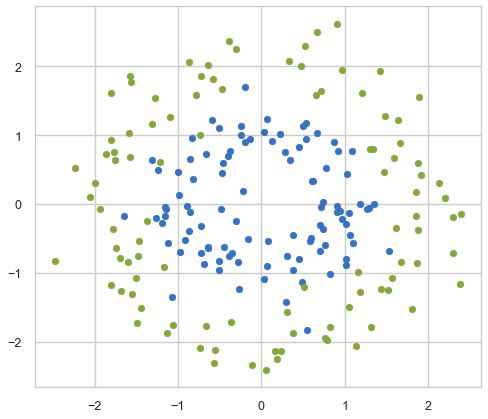

In [92]:
plt.scatter(data_1[0], data_1[1])
plt.scatter(data_2[0], data_2[1])

In [93]:
data = {
  "x_val":np.append(data_1[0],data_2[0]),
  "y_val":np.append(data_1[1],data_2[1]),
  "class": np.append(class_1,class_2)
}
df = pd.DataFrame(data)

In [94]:
df = df.sample(frac=1).reset_index(drop=True)
df

,x_val,y_val,class
0,-0.640792,-0.626331,0
1,-0.221487,0.195102,0
2,-0.832406,0.960398,0
3,0.127626,0.912278,0
4,0.302963,-1.563448,1
...,...,...,...
195,1.528673,-0.684672,0
196,-1.807053,0.935626,1
197,-1.560715,1.770596,1
198,0.594480,-0.494591,0


In [95]:
X = df.drop(["class"], axis=1)
y = df["class"]


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [97]:
model = KNeighborsClassifier(n_neighbors=20, weights="distance")

In [98]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [99]:
y_pred = model.predict(X_test)

In [100]:
accuracy_score(y_pred, y_test)

0.925

Text(0.5, 0, 'k')

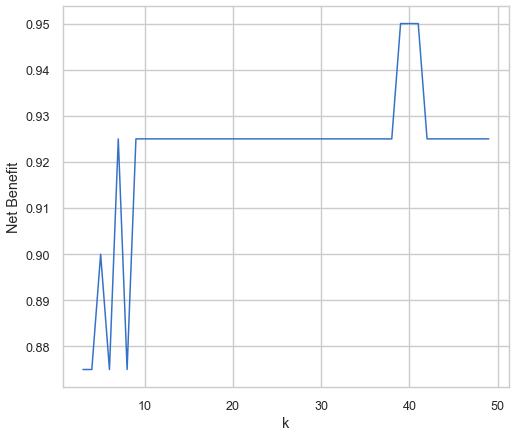

In [101]:
net_benefit_k = []
k_range = range(3, 50)
for k in k_range:
  model = KNeighborsClassifier(k, weights="distance")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  net_benefit_k.append(accuracy_score(y_pred, y_test))

plt.plot(k_range, net_benefit_k)
plt.ylabel("Net Benefit")
plt.xlabel("k")


Too many predictors too few datapoints

Too many data points too few predictors

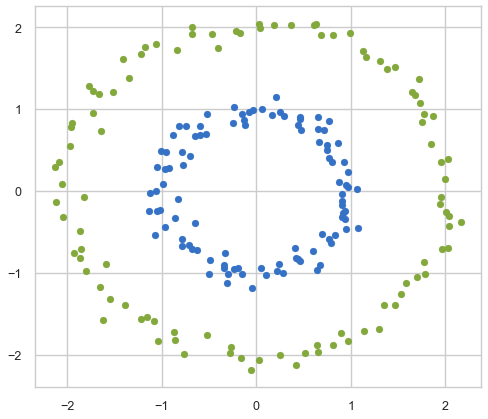